# Week#7  Ganesh Kale

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [143]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [45]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [48]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [50]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

## Exercise 7.1 -

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [198]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

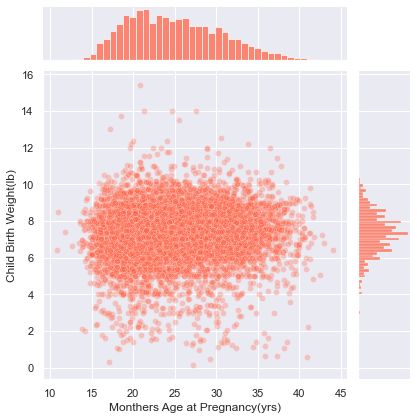

In [199]:
# Scatter plot of birth weight vs mother's age at pregnancy

sns.set(style='darkgrid')
fig = sns.jointplot(data=live, x = 'agepreg', y= 'totalwgt_lb', kind='scatter',color='tomato',alpha=0.3)
fig.set_axis_labels('Monthers Age at Pregnancy(yrs)','Child Birth Weight(lb)')

Text(0.5, 0, 'Monthers Age at Pregnancy (yrs)')

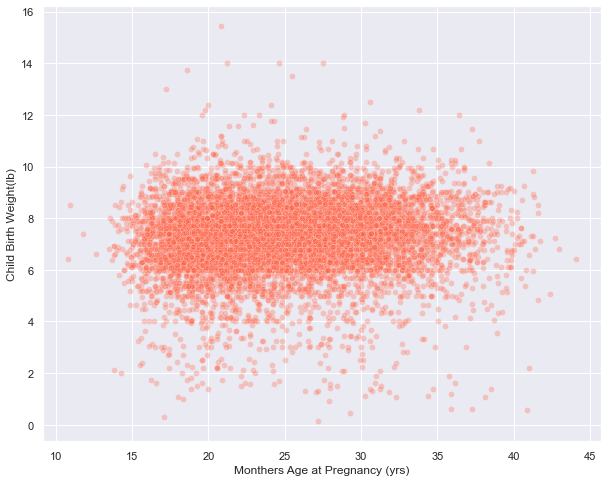

In [200]:
# using scatterplot function -

plt.figure(figsize = (10,8))
sns.scatterplot(data=live, x = 'agepreg', y= 'totalwgt_lb',color='tomato',alpha=0.3)
plt.ylabel('Child Birth Weight(lb)')
plt.xlabel('Monthers Age at Pregnancy (yrs)')

In [201]:
# Percentile of Birth weight vs mothers age

# Create groups of Monthers age 
bins = np.arange(10, 48, 3)
indxs = np.digitize(live.agepreg, bins)
groups = live.groupby(indxs)
mother_age = [group.agepreg.mean() for i, group in groups][1:-1]
wt_cdf = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

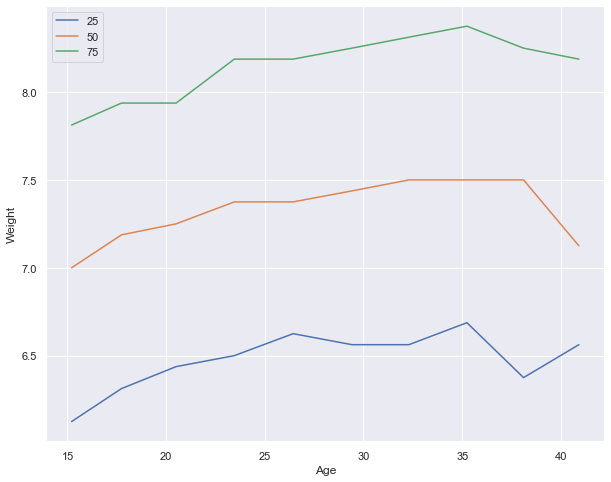

In [202]:
plt.figure(figsize = (10,8))
plt.xlabel('Age')
plt.ylabel('Weight')
for percent in [25, 50 , 75]:
    weights = [cdf.Percentile(percent) for cdf in wt_cdf]
    sns.lineplot(x = mother_age, y = weights, label = percent) 

In [212]:
# Compute Pearson’s and Spearman’s correlations

# Pearson's Corr using thinkstat function Corr()

pcorr = Corr(live.agepreg, live.totalwgt_lb)

# Pearson Corr using numpy np.

pcorr_np = np.corrcoef(live.agepreg, live.totalwgt_lb)

#Using Pandas method corr() - 

pcorr_pd = live[['agepreg','totalwgt_lb']].corr(method='pearson')

# Spearman’s correlations using thinkstat function 

spcorr = SpearmanCorr(live.agepreg, live.totalwgt_lb)

#Using Pandas method corr() - 

spcorr_pd = live[['agepreg','totalwgt_lb']].corr(method='spearman')

print(f"The Pearson's Correlation : {pcorr}")
print(f"The Spearman's Correlation : {spcorr}")

The Pearson's Correlation : 0.06883397035410904
The Spearman's Correlation : 0.09461004109658226


### How would you characterize the relationship between these variables?

1. Based on the scatter plot above , the monthers age at pregnancy do not show any strong positive or negative correaltion with total weight of child at birth. Also the data points are more densed between Mothers age 20 - 30 years and child weight between 6 - 10 pounds.

2. The Pearson's Correaltion is 0.069 which is close to 0 but not close to +1 so does not show any positive correlation or linear relationship.

3. The Spearman's Correaltion is 0.095, this one is also does not show strong correlation, it is close to zero means weaker relatonship between the variables.

4. The Percentile plot shows increase in weight when age is from 10 - 25 but after that lines becomes flat for all these three percentile values.


# Exercise 8.1

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [204]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [205]:
def Estimate1(n=7, iters=100000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))

    
def Estimate2(n=7, iters=100000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

In [206]:
# To check xbar and median are baised estimates of mu and check 
Estimate1()
Estimate2()

Experiment 1
mean error xbar 0.002398768108241867
mean error median 0.002103598944895209
Experiment 2
RMSE biased 0.5157989960753172
RMSE unbiased 0.5783984516287555


### 
1. The mean error of xbar and median are very small and is going to be o when iters m keep on incresing. This means that the mean error is low indicates estimators are unbiased.

2. The RMSE of baised variance is lower than RMSE of unbaised variance

# Exercise 8.2

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

In [207]:
def Estimate3(n=10, iters=1000):
    lam = 2

    means = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)
    stderr= RMSE(means, lam)
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    return [stderr,ci]

In [208]:
print(f"Standard Error : {Estimate3()[0]}\n90% confidence interval: {Estimate3()[1]}")

Standard Error : 0.9445740760359248
90% confidence interval: (1.2594151564927607, 3.7289538965371003)


In [209]:
# Repeat the experiment with a few different values of n and make a plot of standard error versus n

In [210]:
num = np.arange(100,1001,100)
std_err=[]
for n in num:
    est = Estimate3(n=n, iters =10000)
    std_err.append(est[0])
    print(f"For value of {n}, the Standard Error is {est[0]}")

For value of 100, the Standard Error is 0.20530164429299344
For value of 200, the Standard Error is 0.1434130208807979
For value of 300, the Standard Error is 0.11512195098217896
For value of 400, the Standard Error is 0.09955105058548923
For value of 500, the Standard Error is 0.09027891627779921
For value of 600, the Standard Error is 0.0825581607522888
For value of 700, the Standard Error is 0.0756332861259935
For value of 800, the Standard Error is 0.07117537249102317
For value of 900, the Standard Error is 0.06602282610780427
For value of 1000, the Standard Error is 0.0639674867129766


<AxesSubplot:>

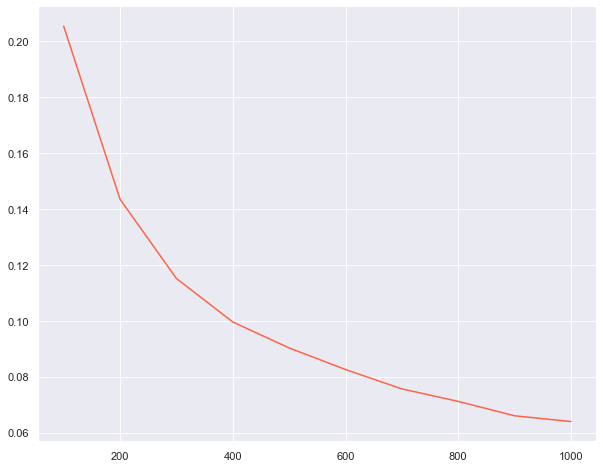

In [213]:
plt.figure(figsize=(10,8))
sns.lineplot(x=num,y=std_err,color='tomato')

#### Based on aboev chart we can say that as the size of n increases the standard error decreases

### END